In [2]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import json
from PIL import Image
%matplotlib inline

In [2]:
val_class_file = open('/home/ningxinL/davis2018/data/DAVIS/ImageSets/2017/val.txt','r')
lines = val_class_file.readlines()
val_class_file.close()

In [3]:
img_base_dir = '/home/ningxinL/davis2018/data/DAVIS/JPEGImages/480p/'
mask_base_dir = '/home/ningxinL/davis2018/data/DAVIS/Annotations/480p/'

In [4]:
def get_bbox(mask, points=None, pad=0, relax=False):
    if points is not None:
        inds = np.flip(points.transpose(), axis=0)
    else:
        inds = np.where(mask > 0)

    if inds[0].shape[0] == 0:
        return None

    if relax:
        pad = 0

    x_min_bound = 0
    y_min_bound = 0
    x_max_bound = mask.shape[1] - 1
    y_max_bound = mask.shape[0] - 1

    x_min = max(inds[1].min() - pad, x_min_bound)
    y_min = max(inds[0].min() - pad, y_min_bound)
    x_max = min(inds[1].max() + pad, x_max_bound)
    y_max = min(inds[0].max() + pad, y_max_bound)

    return [x_min, y_min, x_max, y_max]

In [6]:
def add_turbulence(bbox, v=0.05):
    x_min, y_min, x_max, y_max = bbox[:]
    x_min_new = int(x_min + v * np.random.normal(0, 1) * (x_max - x_min))
    x_max_new = int(x_max + v * np.random.normal(0, 1) * (x_max - x_min))
    y_min_new = int(y_min + v * np.random.normal(0, 1) * (y_max - y_min))
    y_max_new = int(y_max + v * np.random.normal(0, 1) * (y_max - y_min))

    return [x_min_new, y_min_new, x_max_new, y_max_new]

In [7]:
val = {}
for line in lines:
    line = line.strip()
    val[line] = {}
    val_file = open('valfiles/'+line+'.txt','w')
    mask_dir = os.path.join(mask_base_dir, line)
    img_dir = os.path.join(img_base_dir, line)
    assert os.path.exists(mask_dir)
    mask_list = glob.glob(mask_dir+'/*.png')
    for mask_path in mask_list:
        assert os.path.isfile(mask_path)
        try:
            mask_num = (int(mask_path[-7:-4]))          
        except:
            continue
        img_path = os.path.join(img_dir,mask_path.split('/')[-1].replace('.png','.jpg'))
        val[line].update({str(mask_num):{'img_path':img_path, 'mask_path':mask_path}})
        assert os.path.isfile(img_path)
        mask = Image.open(mask_path)
        mask = np.array(mask)
        categorys = np.unique(mask)
        for category in categorys:
            if category != 0:
                temp = (mask == category)
                bbox = get_bbox(temp)
                bbox = add_turbulence(bbox)
                val[line][str(mask_num)].update({str(category):{'bbox':bbox}})
                #print('category:'+str(category)+' '+'bbox：'+str(bbox))

In [8]:
val_json = json.dumps(val)

In [9]:
with open('val_v_5.json','w') as f:
    json.dump(val_json, f)

In [156]:
val_json

'{"dogs-jump": {"35": {"3": {"bbox": [334, 152, 462, 375]}, "2": {"bbox": [69, 182, 316, 475]}, "img_path": "/home/ningxinL/davis2018/data/DAVIS/JPEGImages/480p/dogs-jump/00035.jpg", "mask_path": "/home/ningxinL/davis2018/data/DAVIS/Annotations/480p/dogs-jump/00035.png", "1": {"bbox": [554, 261, 788, 423]}}, "41": {"3": {"bbox": [330, 181, 446, 351]}, "2": {"bbox": [208, 262, 365, 399]}, "img_path": "/home/ningxinL/davis2018/data/DAVIS/JPEGImages/480p/dogs-jump/00041.jpg", "mask_path": "/home/ningxinL/davis2018/data/DAVIS/Annotations/480p/dogs-jump/00041.png", "1": {"bbox": [658, 178, 966, 470]}}, "42": {"3": {"bbox": [362, 130, 465, 364]}, "2": {"bbox": [175, 274, 489, 416]}, "img_path": "/home/ningxinL/davis2018/data/DAVIS/JPEGImages/480p/dogs-jump/00042.jpg", "mask_path": "/home/ningxinL/davis2018/data/DAVIS/Annotations/480p/dogs-jump/00042.png", "1": {"bbox": [702, 339, 834, 414]}}, "44": {"3": {"bbox": [292, 164, 448, 477]}, "2": {"bbox": [300, 302, 444, 384]}, "img_path": "/home/

In [16]:
mask = Image.open('/home/ningxinL/davis2018/data/DAVIS/Annotations/480p/india/00034.png')

In [17]:
type(mask)

PIL.PngImagePlugin.PngImageFile

In [18]:
mask.size

(854, 480)

In [19]:
mask = np.array(mask)

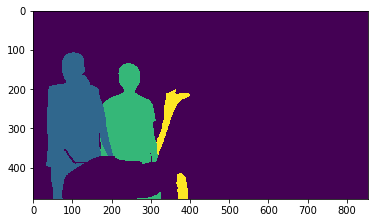

In [20]:
plt.imshow(mask)

In [168]:
np.unique(mask)

array([0, 1, 2, 3], dtype=uint8)

In [7]:
mask.shape

(480, 854)

In [8]:
temp = np.zeros(mask.shape)

In [9]:
temp.shape

(480, 854)

In [21]:
mask[1:10, 1:10] = 20

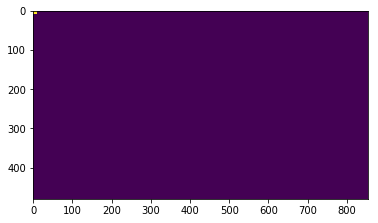

In [27]:
plt.imshow(mask==20)

In [24]:
np.unique(mask)


array([ 0,  1,  2,  3, 20], dtype=uint8)